In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
train_df = pd.read_csv('../data/train_with_feautures.csv')
X = train_df[['year', 'month', 'bathroomcnt', 'bedroomcnt',
              'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
              'finishedsquarefeet12', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
              'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt',
              'roomcnt', 'taxvaluedollarcnt', 'assessmentyear',
              'landtaxvaluedollarcnt','taxamount', 'total', 'White_Percentage', 'Black_Percentage',
              'h_l_Percentage', 'not_h_l_Percentage', 'Asian_Percentage']]

X['poolcnt'] = X['poolcnt'].fillna(0.0)

X['fireplacecnt'] = X['fireplacecnt'].fillna(0.0)
X['fireplacecnt'] = X['fireplacecnt'].astype(float)

X.loc[X['bathroomcnt'] == '3+', 'bathroomcnt'] = 4.0
X['bathroomcnt'] = X['bathroomcnt'].astype(float)
X.loc[X['bathroomcnt'] >= 3, 'bathroomcnt'] = '3+'

X.loc[X['bedroomcnt'] == '3+', 'bedroomcnt'] = 4.0
X['bedroomcnt'] = X['bedroomcnt'].astype(float)
X.loc[X['bedroomcnt'] >= 3, 'bedroomcnt'] = '3+'

X.loc[X['calculatedbathnbr'] == '5+', 'calculatedbathnbr'] = 5.0
X['calculatedbathnbr'] = X['calculatedbathnbr'].astype(float)
X.loc[X['calculatedbathnbr'] >= 5, 'calculatedbathnbr'] = '5+'

X.loc[X['calculatedfinishedsquarefeet'] == '5+', 'calculatedfinishedsquarefeet'] = 5000
X['calculatedfinishedsquarefeet'] = X['calculatedfinishedsquarefeet'].astype(float)

y = train_df[['logerror']]

/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_53360/3626412745.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['poolcnt'] = X['poolcnt'].fillna(0.0)
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_53360/3626412745.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fireplacecnt'] = X['fireplacecnt'].fillna(0.0)
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_53360/3626412745.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [4]:
train_df.isna().sum()

Unnamed: 0                           0
parcelid                             0
logerror                             0
transactiondate_new                  0
year                                 0
month                                0
census_tract                     46728
airconditioningtypeid           118436
bathroomcnt                      46728
bedroomcnt                       46728
buildingqualitytypeid            81507
calculatedbathnbr                47044
calculatedfinishedsquarefeet     46938
finishedsquarefeet12             47207
fips                             46728
fireplacecnt                    130376
fullbathcnt                      47044
garagecarcnt                    110138
garagetotalsqft                 110138
heatingorsystemtypeid            81140
latitude                         46728
longitude                        46728
lotsizesquarefeet                47395
poolcnt                         123379
propertyzoningdesc               81298
regionidcity             

In [109]:
category_variables = ['year', 'month', 'buildingqualitytypeid', 'fireplacecnt', 'bathroomcnt', 'calculatedbathnbr',
                     'garagecarcnt', 'heatingorsystemtypeid', 'poolcnt', 'assessmentyear', 'bedroomcnt']

for col in category_variables:
    X[col] = X[col].astype('category')
    
for col in X.columns:
    if col not in category_variables:
        print(col)
        X[col] = X[col].astype('float')

calculatedfinishedsquarefeet
finishedsquarefeet12
fullbathcnt
garagetotalsqft
latitude
longitude
lotsizesquarefeet
roomcnt
taxvaluedollarcnt
landtaxvaluedollarcnt
taxamount
total
White_Percentage
Black_Percentage
h_l_Percentage
not_h_l_Percentage
Asian_Percentage


/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_52794/3518844207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_52794/3518844207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_52794/3518844207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.3)

In [111]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [112]:
params = {"objective": "reg:squarederror"}
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

n=1000
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50,
   early_stopping_rounds=50
)


[0]	validation-rmse:0.37660	train-rmse:0.37796
[50]	validation-rmse:0.16016	train-rmse:0.15005
[100]	validation-rmse:0.16158	train-rmse:0.14207
[150]	validation-rmse:0.16273	train-rmse:0.13643
[200]	validation-rmse:0.16361	train-rmse:0.13214
[250]	validation-rmse:0.16435	train-rmse:0.12819
[300]	validation-rmse:0.16499	train-rmse:0.12516
[350]	validation-rmse:0.16551	train-rmse:0.12259
[400]	validation-rmse:0.16608	train-rmse:0.11977
[450]	validation-rmse:0.16643	train-rmse:0.11803
[500]	validation-rmse:0.16689	train-rmse:0.11598
[550]	validation-rmse:0.16732	train-rmse:0.11422
[600]	validation-rmse:0.16756	train-rmse:0.11257
[650]	validation-rmse:0.16780	train-rmse:0.11126
[700]	validation-rmse:0.16810	train-rmse:0.10998
[750]	validation-rmse:0.16833	train-rmse:0.10891
[800]	validation-rmse:0.16847	train-rmse:0.10776
[850]	validation-rmse:0.16864	train-rmse:0.10672
[900]	validation-rmse:0.16877	train-rmse:0.10585
[950]	validation-rmse:0.16890	train-rmse:0.10496
[999]	validation-rmse:0

In [113]:
preds = model.predict(dtest_reg)
rmse = mean_squared_error(y_test['logerror'], preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.169


In [114]:
preds

array([ 0.02541419,  0.02297161,  0.00804158, ..., -0.00712219,
       -0.03331199,  0.00313134], dtype=float32)

In [115]:
y_test['preds'] = preds

In [116]:
y_test

,logerror,preds
82673,-0.012100,0.025414
32813,0.050700,0.022972
128684,0.006670,0.008042
106126,-0.043144,0.102695
85957,-0.014100,0.016795
...,...,...
128882,0.046860,-0.002426
119361,-0.055795,0.045455
24116,0.449200,-0.007122
1599,0.002000,-0.033312


<AxesSubplot: xlabel='logerror', ylabel='preds'>

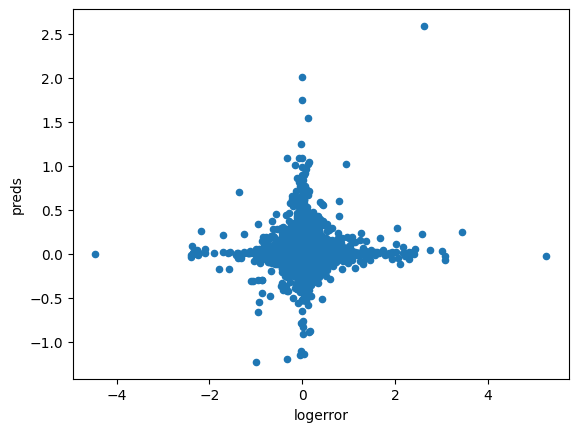

In [117]:
y_test.plot.scatter(x='logerror', y='preds')

<AxesSubplot: >

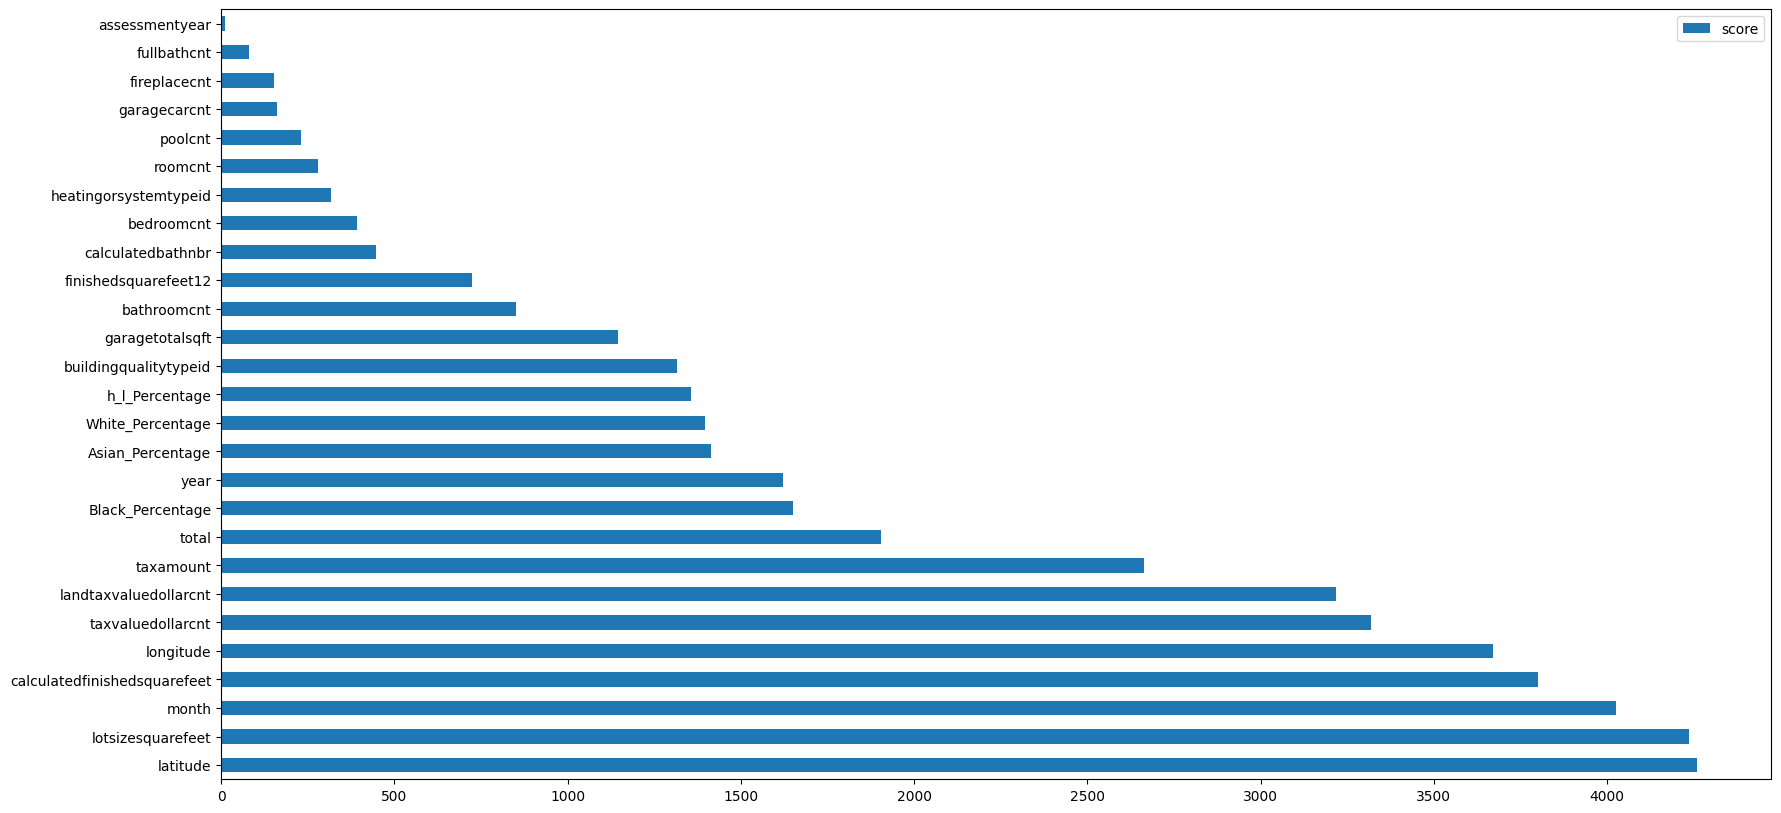

In [118]:
feature_important = model.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [119]:
test_df = pd.read_csv('../data/test_with_feautures.csv')

In [120]:
X = test_df[['year', 'month', 'bathroomcnt', 'bedroomcnt',
              'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
              'finishedsquarefeet12', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
              'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt',
              'roomcnt', 'taxvaluedollarcnt', 'assessmentyear',
              'landtaxvaluedollarcnt','taxamount', 'total', 'White_Percentage', 'Black_Percentage',
              'h_l_Percentage', 'not_h_l_Percentage', 'Asian_Percentage']]

X['poolcnt'] = X['poolcnt'].fillna(0.0)

X['fireplacecnt'] = X['fireplacecnt'].fillna(0.0)
X['fireplacecnt'] = X['fireplacecnt'].astype(float)

X.loc[X['bathroomcnt'] == '3+', 'bathroomcnt'] = 4.0
X['bathroomcnt'] = X['bathroomcnt'].astype(float)
X.loc[X['bathroomcnt'] >= 3, 'bathroomcnt'] = '3+'

X.loc[X['bedroomcnt'] == '3+', 'bedroomcnt'] = 4.0
X['bedroomcnt'] = X['bedroomcnt'].astype(float)
X.loc[X['bedroomcnt'] >= 3, 'bedroomcnt'] = '3+'

X.loc[X['calculatedbathnbr'] == '5+', 'calculatedbathnbr'] = 5.0
X['calculatedbathnbr'] = X['calculatedbathnbr'].astype(float)
X.loc[X['calculatedbathnbr'] >= 5, 'calculatedbathnbr'] = '5+'

X.loc[X['calculatedfinishedsquarefeet'] == '5+', 'calculatedfinishedsquarefeet'] = 5000
X['calculatedfinishedsquarefeet'] = X['calculatedfinishedsquarefeet'].astype(float)

y = test_df[['logerror']]




category_variables = ['year', 'month', 'buildingqualitytypeid', 'fireplacecnt', 'bathroomcnt', 'calculatedbathnbr',
                     'garagecarcnt', 'heatingorsystemtypeid', 'poolcnt', 'assessmentyear', 'bedroomcnt']

for col in category_variables:
    X[col] = X[col].astype('category')
    
for col in X.columns:
    if col not in category_variables:
        print(col)
        X[col] = X[col].astype('float')

calculatedfinishedsquarefeet
finishedsquarefeet12
fullbathcnt
garagetotalsqft
latitude
longitude
lotsizesquarefeet
roomcnt
taxvaluedollarcnt
landtaxvaluedollarcnt
taxamount
total
White_Percentage
Black_Percentage
h_l_Percentage
not_h_l_Percentage
Asian_Percentage


/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_52794/4071395474.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['poolcnt'] = X['poolcnt'].fillna(0.0)
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_52794/4071395474.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fireplacecnt'] = X['fireplacecnt'].fillna(0.0)
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_52794/4071395474.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [121]:
dtest_final = xgb.DMatrix(X, y, enable_categorical=True)
preds = model.predict(dtest_final)
preds

array([0.01385433, 0.0004876 , 0.01211162, ..., 0.12344901, 0.05580629,
       0.01584576], dtype=float32)

In [122]:
submit_df = pd.read_csv('../data/test.csv')
submit_df['logerror'] = preds

In [123]:
submit_df

,parcelid,logerror,transactiondate
0,14634203,0.013854,2017-08-04
1,11721753,0.000488,2017-07-21
2,11637029,0.012112,2017-07-28
3,11446756,0.016249,2017-08-23
4,11429175,0.018772,2017-08-23
...,...,...,...
24222,10833991,0.007754,2017-09-20
24223,11000655,-0.000740,2017-09-20
24224,17239384,0.123449,2017-09-21
24225,12773139,0.055806,2017-09-21
